In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

% matplotlib inline

In [15]:
#os.chdir('..')

In [16]:
path = os.getcwd()
path = path + '/assets/input'
os.chdir(path)

In [17]:
ls

mapdata_copyright_openstreetmap_contributors.rds
mapdata_copyright_openstreetmap_contributors.txt
noaa_weather_qclcd_documentation.pdf
sampleSubmission.csv
spray.csv
test.csv
train.csv
weather.csv


In [18]:
train = pd.read_csv('train.csv')
spray = pd.read_csv('spray.csv')
weather = pd.read_csv('weather.csv')

In [20]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [32]:
train['Date'] = pd.to_datetime(train['Date'])

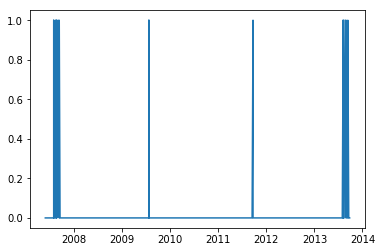

In [38]:
plt.plot(train[train['Trap']=='T002']['Date'],train[train['Trap']=='T002']['WnvPresent'])

In [21]:
spray.head(3)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157


In [22]:
weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4


In [23]:
def DataInspect(dataframe):
    '''Original function (previously called eda) created by Ritika Bhasker
       Good first step when starting any project. Provides overview of
       dataset including missing values, duplicates and types.
       Takes a Pandas dataframe as the argument.
       Modified by Michael Schillawski based on his preferences.'''
    print("Dataframe Shape:", dataframe.shape,"\n")
    print("Duplicate Rows:", dataframe.duplicated().sum(),"\n") #Added this
    print("Dataframe Types \n\n", dataframe.dtypes,"\n")    
    print("Missing Values \n\n", dataframe.isnull().sum(),"\n")
    print("Dataframe Describe \n\n", dataframe.describe(include='all'),"\n")


    print('Unique Values by Variable')
    for item in dataframe:
        print(item,':',dataframe[item].nunique())

In [24]:
DataInspect(train)

Dataframe Shape: (10506, 12) 

Duplicate Rows: 813 

Dataframe Types 

 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

Missing Values 

 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64 

Dataframe Describe 

               Date                                            Address  \
count        10506                      

In [25]:
DataInspect(spray)

Dataframe Shape: (14835, 4) 

Duplicate Rows: 541 

Dataframe Types 

 Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object 

Missing Values 

 Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64 

Dataframe Describe 

               Date        Time      Latitude     Longitude
count        14835       14251  14835.000000  14835.000000
unique          10        8583           NaN           NaN
top     2013-08-15  7:44:32 PM           NaN           NaN
freq          2668         541           NaN           NaN
mean           NaN         NaN     41.904828    -87.736690
std            NaN         NaN      0.104381      0.067292
min            NaN         NaN     41.713925    -88.096468
25%            NaN         NaN     41.785001    -87.794225
50%            NaN         NaN     41.940075    -87.727853
75%            NaN         NaN     41.980978    -87.694108
max            NaN         NaN     42.395983    -87.58672

In [26]:
DataInspect(weather)

Dataframe Shape: (2944, 22) 

Duplicate Rows: 0 

Dataframe Types 

 Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object 

Missing Values 

 Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64 

Da